In [1]:
# Making all necessary imports
import numpy as np
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt

C:\Users\tlamothe\Anaconda\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\tlamothe\Anaconda\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\tlamothe\Anaconda\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\tlamothe\Anaconda\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\tlamothe\Anaconda\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\tlamothe\Anaconda\lib\site-packages\ipykernel\kernelapp.py", line 499, in start
    self.io_loop.start()
  File "

In [263]:
# Add a cell to not display future warnings
import warnings
warnings.filterwarnings("ignore")

In [264]:
# Reading a first dataset to understand it
dataset_folder = 'Datasets/'
csv_file = 'qualite-de-lair-mesuree-dans-la-station-auber.csv'
csv_location = dataset_folder + csv_file
ratp = pd.read_csv(csv_location, sep = ';')

In [265]:
# Saving and cleaning it as df
df = ratp.copy()
print(df.columns)

df['date'] = pd.to_datetime(df['DATE/HEURE'])
del(df['DATE/HEURE'])
df.set_index('date', inplace=True)
df.head()

Index(['DATE/HEURE', 'NO', 'NO2', 'PM10', 'PM2.5', 'CO2', 'TEMP', 'HUMI'], dtype='object')


NO   NO2   PM10  PM2.5    CO2  TEMP  HUMI
date                                                            
2013-04-06 06:00:00  39.0  54.0  265.0  102.0  462.0  17.8  42.8
2013-04-06 09:00:00  77.0  61.0  268.0  102.0  515.0  17.9  43.0
2013-04-06 10:00:00  62.0  62.0  272.0  100.0  517.0  18.0  42.8
2013-04-06 17:00:00  90.0  70.0  340.0  130.0  611.0  18.8  43.2
2013-04-07 06:00:00  19.0  51.0  182.0   79.0  451.0  17.5  42.0

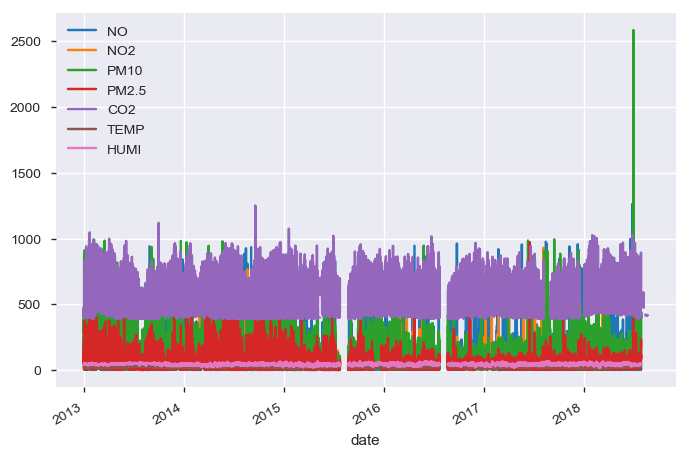

In [266]:
# Plotting
df.plot()

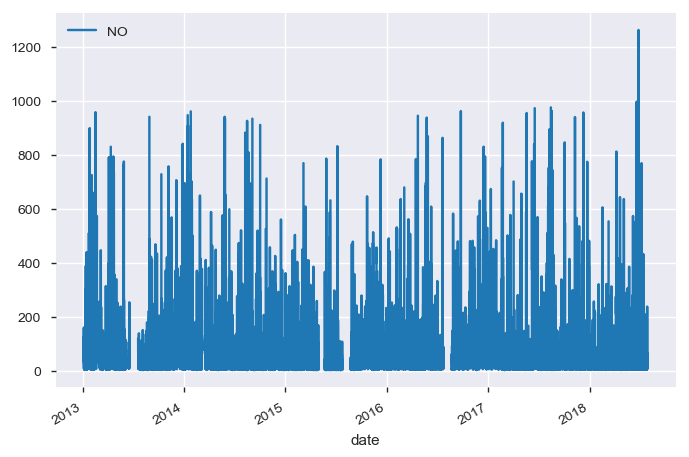

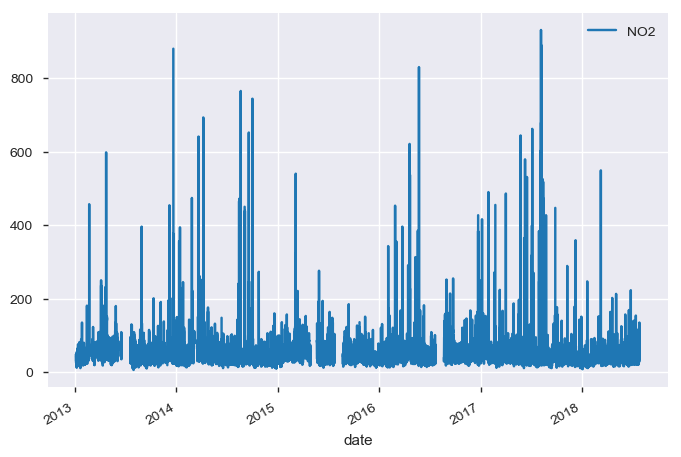

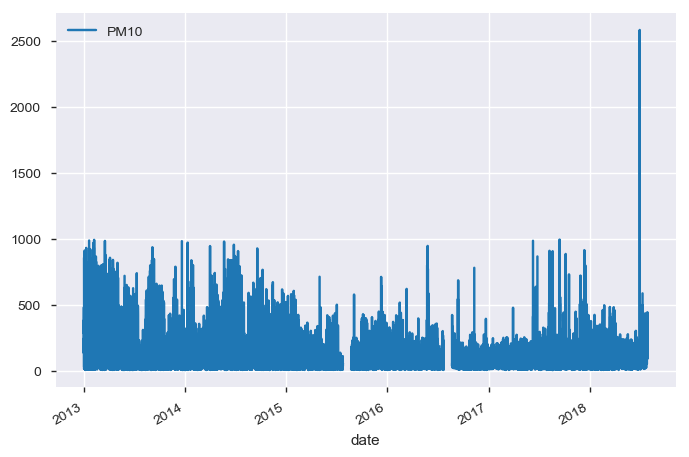

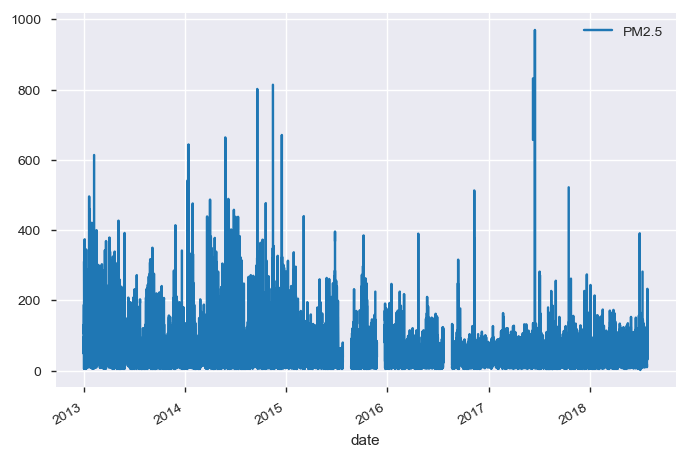

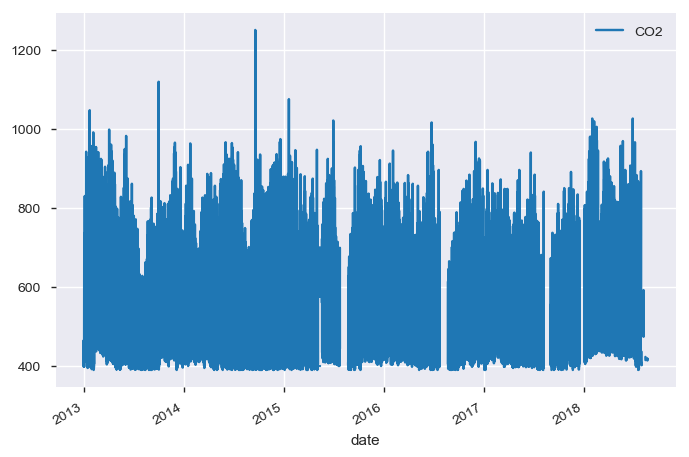

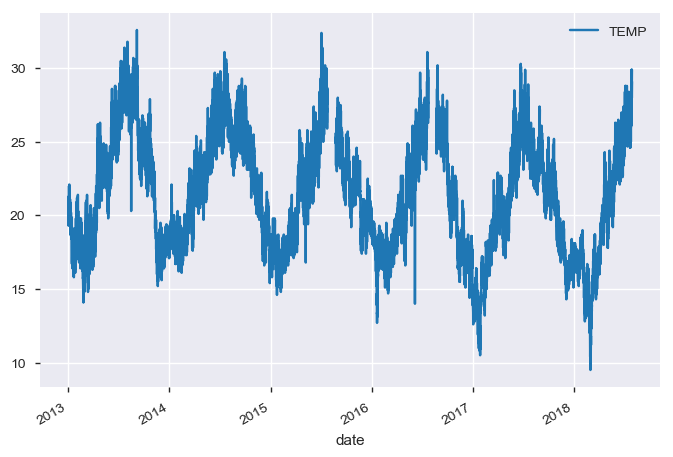

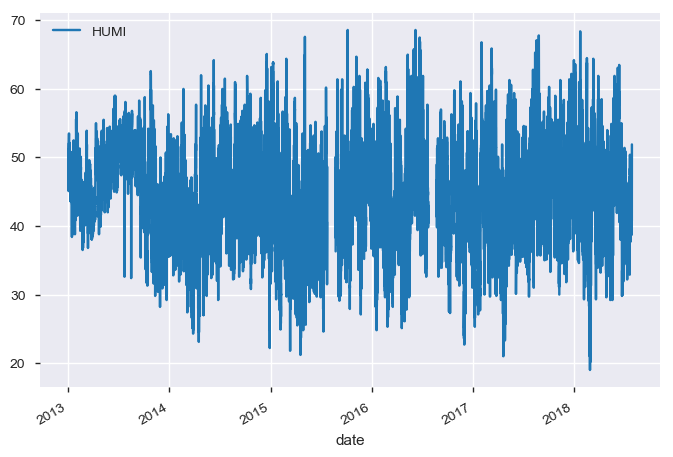

In [267]:
# Plotting again
for i in df.columns:
    df[[i]].plot()

In [268]:
# Making a specific report
# pandas_profiling.ProfileReport(df)

In [269]:
# Describe dataset
df.describe()

NO           NO2          PM10         PM2.5           CO2  \
count  43502.000000  44122.000000  45962.000000  44744.000000  44158.000000   
mean      56.052848     53.206518    143.257865     62.242848    535.925540   
std       69.175808     29.529757    114.485244     49.227822    107.273196   
min        2.000000      6.000000      5.000000      2.000000    390.000000   
25%       16.000000     39.000000     72.000000     31.000000    451.000000   
50%       38.000000     50.000000    114.000000     50.000000    514.000000   
75%       73.000000     62.000000    182.000000     79.000000    591.000000   
max     1263.000000    931.000000   2584.000000    970.000000   1250.000000   

               TEMP          HUMI  
count  47255.000000  47266.000000  
mean      21.332767     44.201870  
std        3.851610      7.203966  
min        9.500000     19.000000  
25%       18.100000     39.200000  
50%       21.300000     44.200000  
75%       24.400000     49.200000  
max       32.600000     68.600000

In [270]:
# Dataset informations
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52198 entries, 2013-04-06 06:00:00 to 2018-12-17 00:00:00
Data columns (total 7 columns):
NO       43502 non-null float64
NO2      44122 non-null float64
PM10     45962 non-null float64
PM2.5    44744 non-null float64
CO2      44158 non-null float64
TEMP     47255 non-null float64
HUMI     47266 non-null float64
dtypes: float64(7)
memory usage: 3.2 MB


In [271]:
# Doing a comparison between datasets : loading data from different stations
dataset_folder = 'Datasets/'
csv_file_1 = 'qualite-de-lair-mesuree-dans-la-station-auber.csv'
csv_file_2 = 'qualite-de-lair-mesuree-dans-la-station-chatelet.csv'
csv_file_3 = 'qualite-de-lair-mesuree-dans-la-station-franklin-d-roosevelt.csv'

ratp_1 = pd.read_csv(dataset_folder + csv_file_1, sep = ';')
ratp_2 = pd.read_csv(dataset_folder + csv_file_2, sep = ';')
ratp_3 = pd.read_csv(dataset_folder + csv_file_3, sep = ';')

In [272]:
# Add a column in each dataset
ratp_1['station'] = '1'
ratp_2['station'] = '2'
ratp_3['station'] = '3'

# Make basic modification
ratp_1.rename(index=str, columns={"DATE/HEURE": "date"}, inplace=True)
ratp_2.rename(index=str, columns={"DATE/HEURE": "date"}, inplace = True)
ratp_3.rename(index=str, columns={"date/heure": "date"}, inplace = True)

# Clean data
ratp_global = pd.concat([ratp_1, ratp_2, ratp_3], axis=0, join='outer', sort=False)
ratp_global['station'] = pd.to_numeric(ratp_global['station'])
ratp_global['date'] = pd.to_datetime(ratp_global['date'])
ratp_global.set_index('date', inplace=True)
ratp_global.sort_index(inplace=True)
ratp_global.head()

NO   NO2   PM10  PM2.5    CO2  TEMP  HUMI  station
date                                                                     
2013-01-01 01:00:00   NaN   NaN  243.0   96.0  465.0  20.5  50.6        1
2013-01-01 01:00:00   6.0  31.0  182.0    NaN  776.0  21.5  46.2        2
2013-01-01 01:00:00  23.0  41.0   26.0    NaN  612.0  15.1  65.6        3
2013-01-01 02:00:00  43.0  61.0   18.0    NaN  536.0  14.9  65.0        3
2013-01-01 02:00:00   6.0  30.0  166.0    NaN  800.0  21.6  47.3        2

In [273]:
# Creating a class to store gare names
class Gare:
    auber = 'Auber'
    franklin = 'Franklin'
    chatelet = 'Chatelet'

# Instanciating one of this object    
gare = Gare()

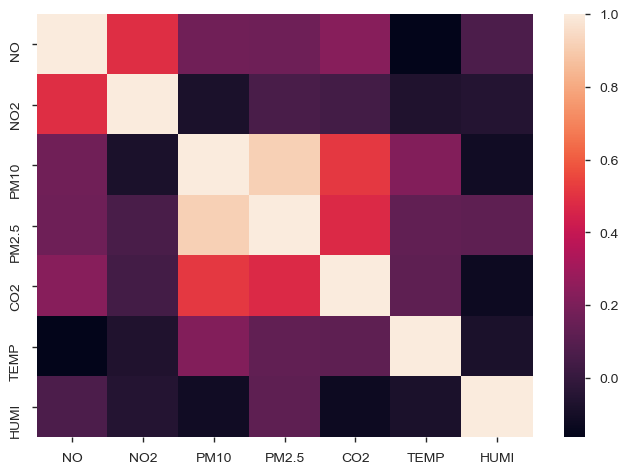

In [274]:
# Plotting correlations between varibales
sns.heatmap(ratp_global.drop(['station'], axis=1).corr())

In [275]:
# Saving pm values in two numpy arrays
pm02 = np.array(df['PM2.5'])
pm10 = np.array(df['PM10'])

# Then deleting pm2.5 which is highly correlated to pm10 and not available for df2 and df3 (chatelet & franklin)
del(ratp_global['PM2.5'])



In [276]:

df_clean = ratp_global.drop_duplicates().dropna()

In [277]:
df_clean.head()

NO   NO2   PM10    CO2  TEMP  HUMI  station
date                                                              
2013-01-01 01:00:00   6.0  31.0  182.0  776.0  21.5  46.2        2
2013-01-01 01:00:00  23.0  41.0   26.0  612.0  15.1  65.6        3
2013-01-01 02:00:00  43.0  61.0   18.0  536.0  14.9  65.0        3
2013-01-01 02:00:00   6.0  30.0  166.0  800.0  21.6  47.3        2
2013-01-01 03:00:00  22.0  52.0   45.0  490.0  14.9  63.3        3

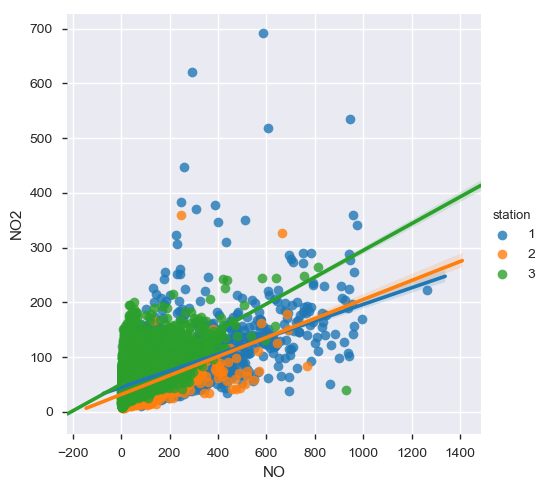

In [278]:
# Create a regression plot using hue
sns.lmplot(data=df_clean,
           x="NO",
           y="NO2",
           hue="station")

# Show the results
plt.show()

In [279]:
# pandas_profiling.ProfileReport(df_clean)

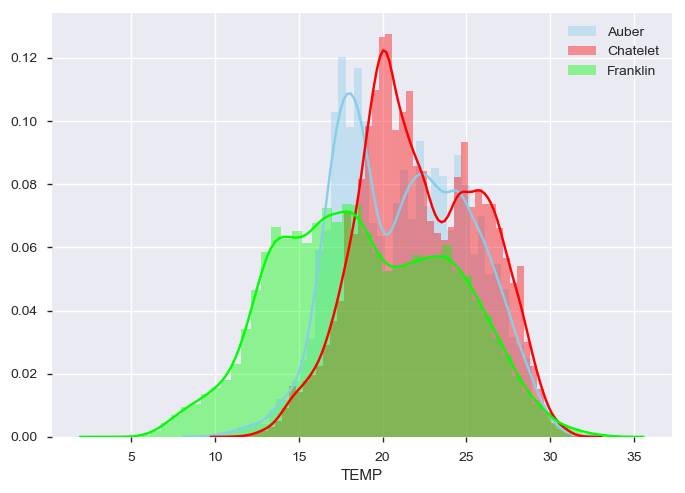

In [280]:
sns.distplot(ratp_1["TEMP"].dropna() , color="skyblue", label=gare.auber)
sns.distplot(ratp_2["TEMP"].dropna() , color="red", label=gare.chatelet)
sns.distplot(ratp_3["TEMP"].dropna() , color="lime", label=gare.franklin)
plt.legend()


In [284]:
df_clean.head()

NO   NO2   PM10    CO2  TEMP  HUMI  station
date                                                              
2013-01-01 01:00:00   6.0  31.0  182.0  776.0  21.5  46.2        2
2013-01-01 01:00:00  23.0  41.0   26.0  612.0  15.1  65.6        3
2013-01-01 02:00:00  43.0  61.0   18.0  536.0  14.9  65.0        3
2013-01-01 02:00:00   6.0  30.0  166.0  800.0  21.6  47.3        2
2013-01-01 03:00:00  22.0  52.0   45.0  490.0  14.9  63.3        3

station                 1     2     3
date_                                
2016-01-01 00:00:00  19.5  22.9  14.7
2016-01-01 01:00:00  19.6  23.2  15.2
2016-01-01 02:00:00  19.5  23.4  15.6
2016-01-01 03:00:00  19.4  23.0  15.9
2016-01-01 04:00:00  19.3  22.8  15.7

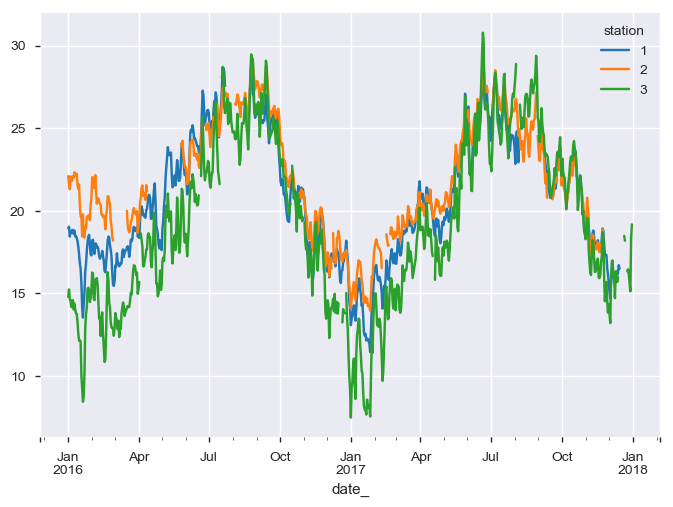

In [286]:
df_clean['date_']=df_clean.index
df_pivot = df_clean['2016':'2017'].pivot(index='date_', columns='station', values='TEMP')
df_pivot.resample('D').mean().plot()
#df_clean.rename(index=str, columns={"1":gare.auber, "2":gare.chatelet, "3":gare.franklin}, inplace=True)
del(df_clean['date_'])
df_pivot.head()